<a href="https://colab.research.google.com/github/adityapatil4141/MNIST-Classification/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

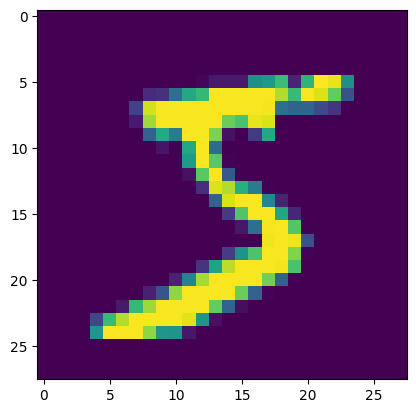

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = Sequential()

# we have to convert data from 2d(28 x 28) to 1d data.
model.add(Flatten(input_shape=(28,28))) # converts data into 784 values/inputs
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu')) #hyperparameter tuning adding one more layer with 32 nodes.
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 100480 param explaination = 784(i/p) * 128(nodes) + 128(bias)
# 1290 param explaination = 128(hidden layer nodes) * 10(o/p nodes) + 10(bias)

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
# We could also use categorical_crossentropy.
# difference between sparse_categorical_crossentropy and categorical_crossentropy is in sparse... we do not have do OneHotEncode
# but in categorical_crossentropy we have to do onehotencode.

In [ ]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.9168 - val_loss: 0.1581 - val_accuracy: 0.9520
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1266 - accuracy: 0.9623 - val_loss: 0.1162 - val_accuracy: 0.9659
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0875 - accuracy: 0.9738 - val_loss: 0.1026 - val_accuracy: 0.9702
Epoch 4/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0984 - val_accuracy: 0.9712
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0939 - val_accuracy: 0.9739
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0949 - val_accuracy: 0.9725
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.1042 - val_accuracy:

In [ ]:
y_prob = model.predict(x_test)
# This will go through all the images and find out probabilities of a no. being 0,1,2...etc

313/313 [==============================] - 1s 2ms/step


In [ ]:
# For every array we have to find out which value is maximum.
y_pred = y_prob.argmax(axis=1)

In [ ]:
# Accuracy :
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9763

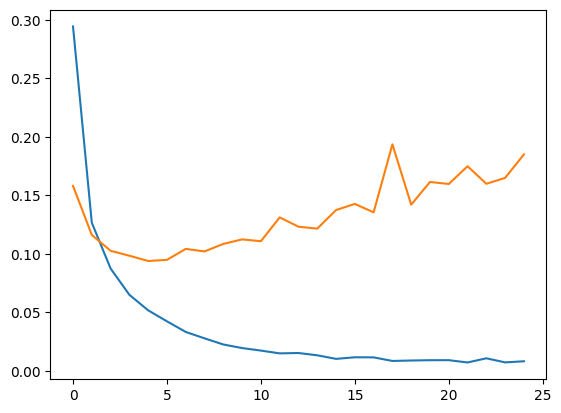

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

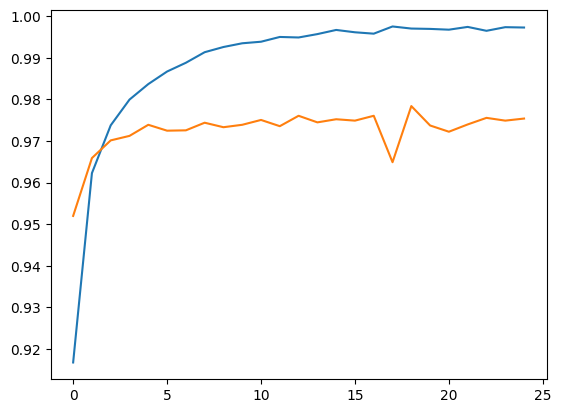

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# Overfitting!!!

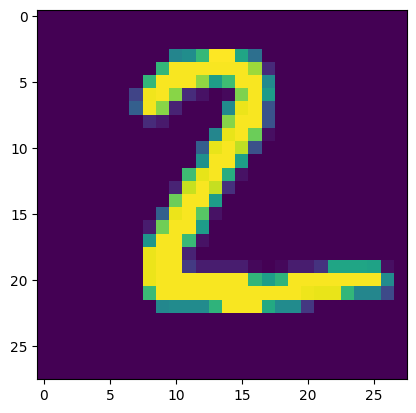

In [ ]:
plt.imshow(x_test[1])

In [ ]:
# Prediction :

model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 18ms/step


array([2])